In [1]:
import pandas as pd
import geopandas

''' The sidewalk ratio dataset does not have neighborhood names instead containing 
geoid10 as the location information, so I'm using the 2010 Pittsburgh census data 
set which has both geoid10 and neighborhood information to map between the two. 
''' 
census = pd.read_csv("2010_Census_Block_Groups.csv").filter(['hood','geoid10'])
census.head()

,hood,geoid10
0,Central Oakland,420030405001
1,North Oakland,420030404001
2,West Oakland,420030402002
3,Crawford-Roberts,420030305002
4,Crawford-Roberts,420030305001


In [2]:
# Create a dictionary which maps each geoid10 to the neighborhood it is in
geo_to_hood = {}
for index, row in census.iterrows():
    if row['geoid10'] not in geo_to_hood:
          geo_to_hood[row['geoid10']] = row['hood']

# Demonstration
print(geo_to_hood[420030405001])

Central Oakland


In [3]:
sr = pd.read_csv("sidewalk_ratio.csv")
print(sr.iloc[35])

GEOID               420030605001
NAMELSAD           Block Group 1
SidewalkStepLFt          22416.3
StreetLFt                12986.6
Ratio                     1.7261
Name: 35, dtype: object


In [4]:
# Demonstration Geoid of the 35th row in sidewalk ratios and the associated neighborhood:
print("Geoid", sr['GEOID'][35], "is in", geo_to_hood[sr['GEOID'][35]])

Geoid 420030605001 is in Polish Hill


In [5]:
# Since a neighborhood can have multiple geoid's inside, create a list of ratios for each neighborhood
sr_ratios = {} # A dict with the key being the neighborhood name and value: the list of ratios for the neighborhood
for index, row in sr.iterrows():
    try:
        # geo_to_hood[row['GEOID']]) gives us the geoid's neighborhood
        if geo_to_hood[row['GEOID']] in sr_ratios:
            ratio_list = sr_ratios[geo_to_hood[row['GEOID']]]
            ratio_list.append(row['Ratio'])
            sr_ratios[geo_to_hood[row['GEOID']]] = ratio_list
        else:
            ratio_list = []
            ratio_list.append(row['Ratio'])
            sr_ratios[geo_to_hood[row['GEOID']]] = ratio_list
    except:
        continue

# Demonstration
print("Sidewalk ratios in Central Oakland:", sr_ratios["Central Oakland"])

Sidewalk ratios in Central Oakland: [1.6020824519999999, 1.489100874, 1.41298434]


In [6]:
# Get the average sidewalk ratio for each neighborhood
for key, value in sr_ratios.items():
   avg = 0
   for item in value:
        avg += item
   avg /= len(value)
   sr_ratios[key] = avg
       
print("Central Oakland's sidewalk ratio is " + str(sr_ratios["Central Oakland"]))    

Central Oakland's sidewalk ratio is 1.501389222


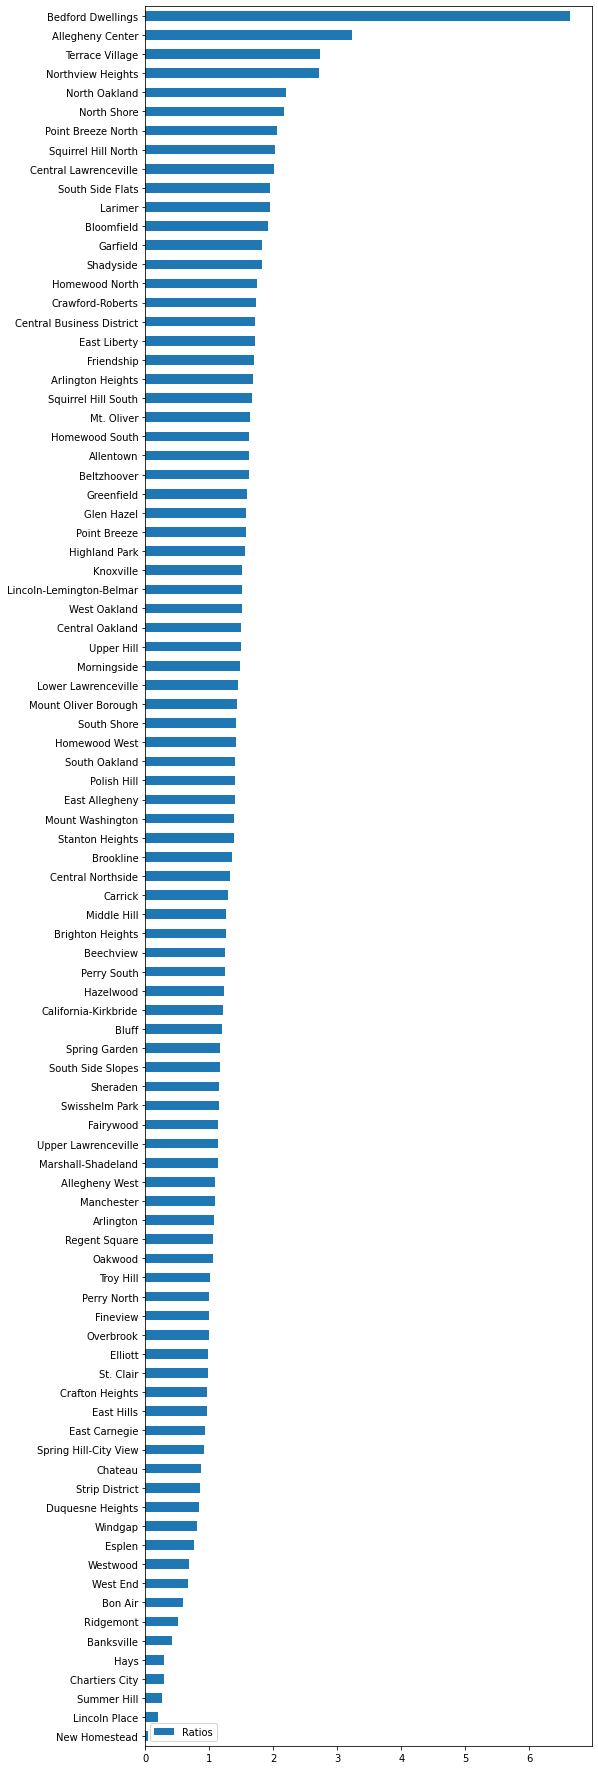

In [7]:
ratios_df = pd.DataFrame.from_dict(sr_ratios, orient="index", columns=['Ratios'])
ratios_df = ratios_df.sort_values(by="Ratios", ascending=True)
ratios_df.plot(kind="barh", figsize=(8, 32))

In [8]:
bottom_5 = ratios_df.head()
bottom_5

,Ratios
New Homestead,0.047462
Lincoln Place,0.203395
Summer Hill,0.255189
Chartiers City,0.284980
Hays,0.286175


Text(0, 0.5, 'Sidewalk to street ratio')

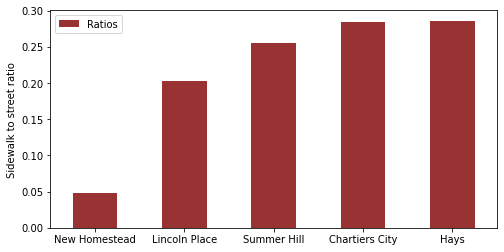

In [9]:
from matplotlib import pyplot
my_color = (0.6,.2,.2)
bottom_5.plot(kind="bar", rot=0, figsize=(8,4), color=my_color)
pyplot.ylabel("Sidewalk to street ratio")

In [10]:
top_5 = ratios_df.tail()
top_5

,Ratios
North Oakland,2.196612
Northview Heights,2.712593
Terrace Village,2.732608
Allegheny Center,3.227465
Bedford Dwellings,6.644908


Text(0, 0.5, 'Sidewalk to street ratio')

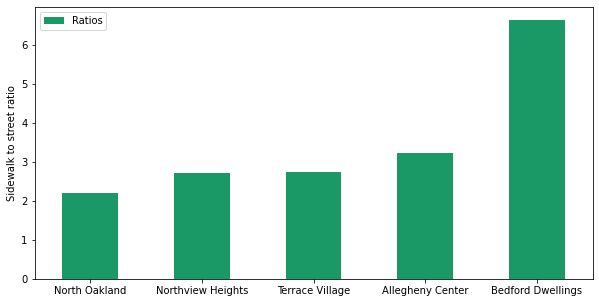

In [11]:
my_color = (0.1,.6,.4)
top_5.plot(kind="bar", rot=0, figsize=(10,5), color=my_color)
pyplot.ylabel("Sidewalk to street ratio")

In [12]:
sorted_ratios = ratios_df.sort_values(by="Ratios", ascending=False)
sorted_ratios.head()

,Ratios
Bedford Dwellings,6.644908
Allegheny Center,3.227465
Terrace Village,2.732608
Northview Heights,2.712593
North Oakland,2.196612


In [17]:
# Store final results of this notebook to use in our final combined notebook
%store -r sorted_ratios

                     Ratios
Bedford Dwellings  6.644908
Allegheny Center   3.227465
Terrace Village    2.732608
Northview Heights  2.712593
North Oakland      2.196612
...                     ...
Hays               0.286175
Chartiers City     0.284980
Summer Hill        0.255189
Lincoln Place      0.203395
New Homestead      0.047462

[91 rows x 1 columns]
